In [95]:
import pandas_datareader.data as web
import datetime    

stock_symbol = "TSLA"
start = datetime.datetime(2013, 1, 1)
end = datetime.date.today()   #end = datetime.datetime(2016, 1, 27)
df = web.DataReader(stock_symbol, 'yahoo', start, end)

dates =[]
for x in range(len(df)):
    newdate = str(df.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)
    #dates.append(datetime.date(newdate))
    
df['date_str'] = dates
#date_series = pd.to_datetime(pd.Series(dates))
#df['dates'] = date_series
#date_series
df['dates'] = pd.to_datetime(df['date_str'])
#df.drop(columns=['date_str'], inplace=True)
df['doy'] = df.dates.dt.dayofyear

print(df.head())
print(df.tail())
df.loc['2020-02-18']

                 High        Low       Open      Close   Volume  Adj Close  \
Date                                                                         
2013-01-02  35.450001  34.709999  35.000000  35.360001  1194800  35.360001   
2013-01-03  35.450001  34.750000  35.180000  34.770000   742000  34.770000   
2013-01-04  34.799999  33.919998  34.799999  34.400002   674000  34.400002   
2013-01-07  34.799999  33.900002  34.799999  34.340000   442000  34.340000   
2013-01-08  34.500000  33.110001  34.500000  33.680000  1284000  33.680000   

              date_str      dates  doy  
Date                                    
2013-01-02  2013-01-02 2013-01-02    2  
2013-01-03  2013-01-03 2013-01-03    3  
2013-01-04  2013-01-04 2013-01-04    4  
2013-01-07  2013-01-07 2013-01-07    7  
2013-01-08  2013-01-08 2013-01-08    8  
                  High         Low        Open       Close    Volume  \
Date                                                                   
2020-02-11  783.510010

High                         860
Low                       832.36
Open                       841.6
Close                     848.67
Volume                  12086439
Adj Close                 848.67
date_str              2020-02-18
dates        2020-02-18 00:00:00
doy                           49
Name: 2020-02-18 00:00:00, dtype: object

In [96]:
year_grp = df.groupby(df.dates.dt.year)

In [97]:
year_grp.groups.keys()

dict_keys([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [98]:
y19 = year_grp.groups[2019]
y19

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [99]:
df19 = df[df.dates.isin(y19)]
df19

,High,Low,Open,Close,Volume,Adj Close,date_str,dates,doy
Date,,,,,,,,,
2019-01-02,315.130005,298.799988,306.100006,310.119995,11658600,310.119995,2019-01-02,2019-01-02,2
2019-01-03,309.399994,297.380005,307.000000,300.359985,6965200,300.359985,2019-01-03,2019-01-03,3
2019-01-04,318.000000,302.730011,306.000000,317.690002,7394100,317.690002,2019-01-04,2019-01-04,4
2019-01-07,336.739990,317.750000,321.720001,334.959991,7551200,334.959991,2019-01-07,2019-01-07,7
2019-01-08,344.010010,327.019989,341.959991,335.350006,7008500,335.350006,2019-01-08,2019-01-08,8
...,...,...,...,...,...,...,...,...,...
2019-12-24,425.470001,412.690002,418.359985,425.250000,8054700,425.250000,2019-12-24,2019-12-24,358
2019-12-26,433.480011,426.350006,427.910004,430.940002,10633900,430.940002,2019-12-26,2019-12-26,360
2019-12-27,435.309998,426.109985,435.000000,430.380005,9945700,430.380005,2019-12-27,2019-12-27,361


In [100]:
y18 = year_grp.groups[2018]
df18 = df[df.dates.isin(y18)]
df18

,High,Low,Open,Close,Volume,Adj Close,date_str,dates,doy
Date,,,,,,,,,
2018-01-02,322.109985,311.000000,312.000000,320.529999,4352200,320.529999,2018-01-02,2018-01-02,2
2018-01-03,325.250000,315.549988,321.000000,317.250000,4521500,317.250000,2018-01-03,2018-01-03,3
2018-01-04,318.549988,305.679993,312.869995,314.619995,9946300,314.619995,2018-01-04,2018-01-04,4
2018-01-05,317.239990,312.000000,316.619995,316.579987,4591200,316.579987,2018-01-05,2018-01-05,5
2018-01-08,337.019989,315.500000,316.000000,336.410004,9859400,336.410004,2018-01-08,2018-01-08,8
...,...,...,...,...,...,...,...,...,...
2018-12-24,314.500000,295.200012,313.500000,295.390015,5559900,295.390015,2018-12-24,2018-12-24,358
2018-12-26,326.970001,294.089996,300.000000,326.089996,8163100,326.089996,2018-12-26,2018-12-26,360
2018-12-27,322.170013,301.500000,319.839996,316.130005,8575100,316.130005,2018-12-27,2018-12-27,361


In [105]:
def get_year_df(year):
    yxx = year_grp.groups[year]
    dfxx = df[df.dates.isin(yxx)]
    return dfxx

for year in year_grp.groups.keys():
    dfxx = get_year_df(year)
    print('{} has {} rows'.format(year, dfxx.shape[0]))


2013 has 252 rows
2014 has 252 rows
2015 has 252 rows
2016 has 252 rows
2017 has 251 rows
2018 has 251 rows
2019 has 252 rows
2020 has 32 rows


In [106]:
get_year_df(2019)

,High,Low,Open,Close,Volume,Adj Close,date_str,dates,doy
Date,,,,,,,,,
2019-01-02,315.130005,298.799988,306.100006,310.119995,11658600,310.119995,2019-01-02,2019-01-02,2
2019-01-03,309.399994,297.380005,307.000000,300.359985,6965200,300.359985,2019-01-03,2019-01-03,3
2019-01-04,318.000000,302.730011,306.000000,317.690002,7394100,317.690002,2019-01-04,2019-01-04,4
2019-01-07,336.739990,317.750000,321.720001,334.959991,7551200,334.959991,2019-01-07,2019-01-07,7
2019-01-08,344.010010,327.019989,341.959991,335.350006,7008500,335.350006,2019-01-08,2019-01-08,8
...,...,...,...,...,...,...,...,...,...
2019-12-24,425.470001,412.690002,418.359985,425.250000,8054700,425.250000,2019-12-24,2019-12-24,358
2019-12-26,433.480011,426.350006,427.910004,430.940002,10633900,430.940002,2019-12-26,2019-12-26,360
2019-12-27,435.309998,426.109985,435.000000,430.380005,9945700,430.380005,2019-12-27,2019-12-27,361


In [112]:
from matplotlib import pyplot as plt

In [113]:
plt.style.use('fivethirtyeight')

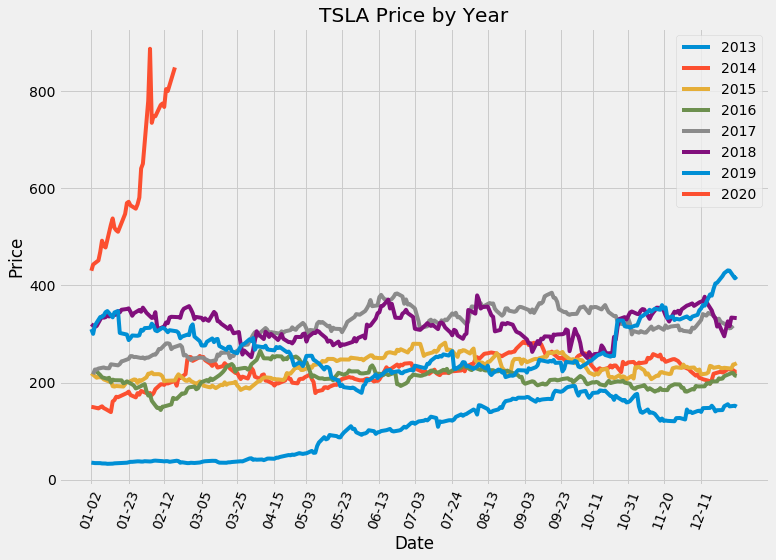

In [136]:
import numpy as np

fig = plt.gcf()
fig.set_size_inches(11,8) 

for name, group in year_grp:
    plt.plot(group['doy'], group['Close'], label=name)

# get the current location and labels
#locs, labels = xticks()
# set label locations
#xticks(np.arange(0, 1, step=0.2))
# set text labels
group = get_year_df(2013)
#locs = np.arange(1, 365, step=14)
locs = group['doy'][0::14]
labels = group['date_str'][0::14]
plt.xticks(locs, labels.str[5:10], rotation=70)
# set text labels and properties
#xticks(np.arange(12), calendar.month_name[1:13], rotation=20)

plt.legend()

plt.title("{} Price by Year".format(stock_symbol))
plt.xlabel("Date")
plt.ylabel("Price")

plt.tight_layout()
plt.show()

In [91]:
timeit df['dates'] = pd.to_datetime(pd.Series(dates))

6.19 ms ± 439 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [92]:
df.groupby(df['dates'].map(lambda x: datetime.date(x).year))

OverflowError: signed integer is less than minimum

In [ ]:
df

In [ ]:
import pandas as pd

#df.columns
df.groupby(df.dates.dt.year)
